# IPL Data Set Analysis Using Python 

In [1]:
## import necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

#for pandas profiling
import pandas_profiling as pp

C:\Users\imbha\Anaconda3\lib\site-packages\scipy\__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.4)
  UserWarning)


In [2]:
## Import file to jupyter notebook

del_df = pd.read_csv('C:/Users/imbha/Desktop/my_team_11_dataset/ipldata/deliveries.csv')
match_df = pd.read_csv('C:/Users/imbha/Desktop/my_team_11_dataset/ipldata/matches.csv')

In [3]:
# Describe the dataset and get the basich info from
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [5]:
del_df.shape # to check the dimensions of data set

(164750, 21)

In [6]:
match_df.shape

(696, 18)

In [7]:
## Check the basic structure of the File :
match_df.head() 

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [8]:
del_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [9]:
# Describe the data set to get the five point summary:
match_df.describe().T

count         mean          std     min      25%     50%  \
id              696.0   974.103448  2143.239623     1.0   174.75   348.5   
season          696.0  2012.965517     3.069266  2008.0  2010.00  2013.0   
dl_applied      696.0     0.027299     0.163070     0.0     0.00     0.0   
win_by_runs     696.0    13.472701    23.607994     0.0     0.00     0.0   
win_by_wickets  696.0     3.349138     3.411398     0.0     0.00     3.0   

                    75%     max  
id               522.25  7953.0  
season          2016.00  2018.0  
dl_applied         0.00     1.0  
win_by_runs       19.00   146.0  
win_by_wickets     6.00    10.0

In [10]:
del_df.describe().T

count        mean          std  min    25%    50%    75%  \
match_id       164750.0  977.951757  2147.671843  1.0  175.0  349.0  521.0   
inning         164750.0    1.482307     0.501592  1.0    1.0    1.0    2.0   
over           164750.0   10.151879     5.675666  1.0    5.0   10.0   15.0   
ball           164750.0    3.616243     1.807398  1.0    2.0    4.0    5.0   
is_super_over  164750.0    0.000492     0.022168  0.0    0.0    0.0    0.0   
wide_runs      164750.0    0.037184     0.254087  0.0    0.0    0.0    0.0   
bye_runs       164750.0    0.004898     0.115006  0.0    0.0    0.0    0.0   
legbye_runs    164750.0    0.021548     0.196410  0.0    0.0    0.0    0.0   
noball_runs    164750.0    0.004200     0.071111  0.0    0.0    0.0    0.0   
penalty_runs   164750.0    0.000061     0.017421  0.0    0.0    0.0    0.0   
batsman_runs   164750.0    1.237238     1.603511  0.0    0.0    1.0    1.0   
extra_runs     164750.0    0.067891     0.345144  0.0    0.0    0.0    0.0   
total_runs     164750.0    1.305129     1.596255  0.0    0.0    1.0    1.0   

                  max  
match_id       7953.0  
inning            4.0  
over             20.0  
ball              9.0  
is_super_over     1.0  
wide_runs         5.0  
bye_runs          4.0  
legbye_runs       5.0  
noball_runs       5.0  
penalty_runs      5.0  
batsman_runs      7.0  
extra_runs        7.0  
total_runs       10.0

## Run the profile report to get the idea of data set distribution and missing values

In [11]:
pp.ProfileReport(match_df)

In [12]:
pp.ProfileReport(del_df)

### Getting the frequency of most man of the match award

In [13]:
match_df['player_of_match'].value_counts()[0:5]

CH Gayle          20
AB de Villiers    18
RG Sharma         16
YK Pathan         16
DA Warner         15
Name: player_of_match, dtype: int64

#### Form above result we can find out top 5 palyer who won maximum number of man of the match awards, out of which Chris gayle has won maximum number of awards.

In [14]:
## If we want a list of 10 palyes who won maximum number of awards:
match_df['player_of_match'].value_counts()[0:10]

CH Gayle          20
AB de Villiers    18
RG Sharma         16
YK Pathan         16
DA Warner         15
MS Dhoni          14
SK Raina          14
G Gambhir         13
SR Watson         13
AM Rahane         12
Name: player_of_match, dtype: int64

#### Making a bar-plot for the top 5 players with most man of the match awards 

<BarContainer object of 5 artists>

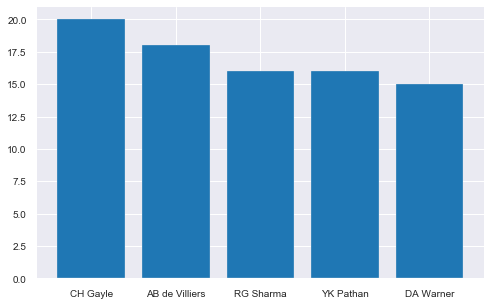

In [15]:
plt.figure(figsize=(8,5))
plt.bar(list(match_df['player_of_match'].value_counts()[0:5].keys()),list(match_df['player_of_match'].value_counts()[0:5]))

### Getting the frequency of result column

In [16]:
match_df['result'].value_counts()

normal       686
tie            7
no result      3
Name: result, dtype: int64

In [17]:
## In above result, the result catagories are three types ,
# 1> Normal where the match result is in win or loss, which is equal to 686
# 2> where the match result is tie. which is equal to 7
# 3> No result, match may not be completed because of some reasons, which is equal to 3 

### Finding out the number of toss wins with respect to each team :

Which team won maximum number of toss:

In [18]:
match_df['toss_winner'].value_counts()

Mumbai Indians                 90
Kolkata Knight Riders          87
Delhi Daredevils               80
Royal Challengers Bangalore    77
Chennai Super Kings            77
Kings XI Punjab                75
Rajasthan Royals               69
Deccan Chargers                43
Sunrisers Hyderabad            42
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

### Extracting the records where a team won batting first

In [19]:
batting_first = match_df[match_df['win_by_runs']!=0] ##Beacuse if team wins batting second than the coulmn having the win by runs contain the records having value zero

In [20]:
batting_first.head()

id  season       city        date                        team1  \
0    1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
4    5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
8    9    2017       Pune  2017-04-11             Delhi Daredevils   
13  14    2017    Kolkata  2017-04-15        Kolkata Knight Riders   
14  15    2017      Delhi  2017-04-15             Delhi Daredevils   

                          team2                  toss_winner toss_decision  \
0   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4              Delhi Daredevils  Royal Challengers Bangalore           bat   
8        Rising Pune Supergiant       Rising Pune Supergiant         field   
13          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
14              Kings XI Punjab             Delhi Daredevils           bat   

    result  dl_applied                       winner  win_by_runs  \
0   normal           0          Sunrisers Hyderabad           35   
4   normal           0  Royal Challengers Bangalore           15   
8   normal           0             Delhi Daredevils           97   
13  normal           0        Kolkata Knight Riders           17   
14  normal           0             Delhi Daredevils           51   

    win_by_wickets player_of_match                                      venue  \
0                0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
4                0       KM Jadhav                      M Chinnaswamy Stadium   
8                0       SV Samson    Maharashtra Cricket Association Stadium   
13               0      RV Uthappa                               Eden Gardens   
14               0     CJ Anderson                           Feroz Shah Kotla   

        umpire1      umpire2 umpire3  
0   AY Dandekar     NJ Llong     NaN  
4           NaN          NaN     NaN  
8   AY Dandekar       S Ravi     NaN  
13  AY Dandekar     NJ Llong     NaN  
14     YC Barde  Nitin Menon     NaN

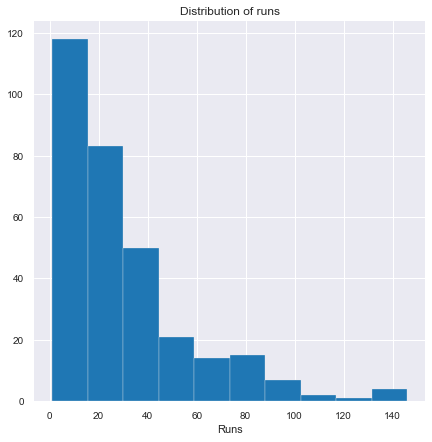

In [21]:
# Making a histogram
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of runs")
plt.xlabel("Runs")
plt.show()

#### Conclusion from above graph is that there are around 100 matches , whoes result margin lies between the 0-20, which indicates that maximum matches are close match

## Finding out the number of wins w.r.t each team in second batting

In [22]:
batting_first['winner'].value_counts()

Mumbai Indians                 51
Chennai Super Kings            49
Kings XI Punjab                35
Kolkata Knight Riders          34
Royal Challengers Bangalore    32
Sunrisers Hyderabad            28
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

#### From above we can say mumbai indian wins maximum number of time while batting first

### making bar plot for top 3 teams with most wins after batting first

<BarContainer object of 3 artists>

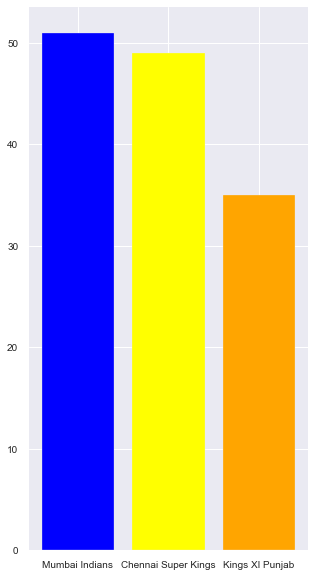

In [23]:
plt.figure(figsize=(5,10))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])

## Percentage Distribution of wins with respect to teams batting first 
Making Pie Chart

([<matplotlib.patches.Wedge at 0x1f3036509e8>,
 [Text(0.9607490118420617, 0.5356877226934571, 'Mumbai Indians'),
  Text(0.07125917559118573, 1.097689450570636, 'Chennai Super Kings'),
  Text(-0.7680605557748513, 0.7874534796817059, 'Kings XI Punjab'),
  Text(-1.0933871226529501, 0.12043504480300846, 'Kolkata Knight Riders'),
  Text(-0.938619921420663, -0.5735788028791411, 'Royal Challengers Bangalore'),
  Text(-0.4524157177055913, -1.0026564807415024, 'Sunrisers Hyderabad'),
  Text(0.13677819473959443, -1.0914631122689296, 'Rajasthan Royals'),
  Text(0.6598041946190426, -0.880146820003979, 'Delhi Daredevils'),
  Text(0.9660438017557783, -0.526079246016456, 'Deccan Chargers'),
  Text(1.0632249972415797, -0.28205071395166315, 'Pune Warriors'),
  Text(1.0877139323748204, -0.16394633670108213, 'Rising Pune Supergiant'),
  Text(1.0965006345118657, -0.08767187984226253, 'Rising Pune Supergiants'),
  Text(1.0991248137068799, -0.04387076354266635, 'Kochi Tuskers Kerala'),
  Text(1.099945295270

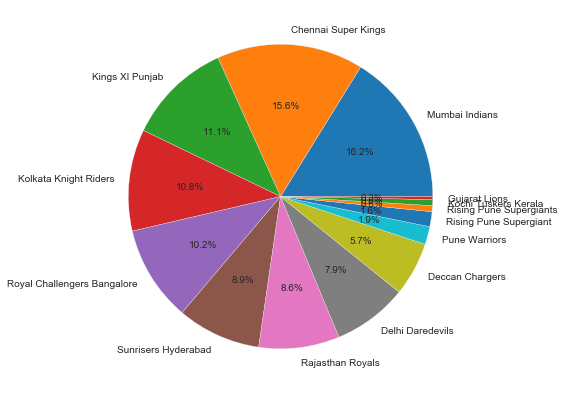

In [24]:
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')

## Extracting those records where a team has won after batting second

In [25]:
batting_second = match_df[match_df['win_by_wickets']!=0]

In [26]:
batting_second.head()

id  season       city        date                   team1  \
1   2    2017       Pune  2017-04-06          Mumbai Indians   
2   3    2017     Rajkot  2017-04-07           Gujarat Lions   
3   4    2017     Indore  2017-04-08  Rising Pune Supergiant   
5   6    2017  Hyderabad  2017-04-09           Gujarat Lions   
6   7    2017     Mumbai  2017-04-09   Kolkata Knight Riders   

                    team2             toss_winner toss_decision  result  \
1  Rising Pune Supergiant  Rising Pune Supergiant         field  normal   
2   Kolkata Knight Riders   Kolkata Knight Riders         field  normal   
3         Kings XI Punjab         Kings XI Punjab         field  normal   
5     Sunrisers Hyderabad     Sunrisers Hyderabad         field  normal   
6          Mumbai Indians          Mumbai Indians         field  normal   

   dl_applied                  winner  win_by_runs  win_by_wickets  \
1           0  Rising Pune Supergiant            0               7   
2           0   Kolkata Knight Riders            0              10   
3           0         Kings XI Punjab            0               6   
5           0     Sunrisers Hyderabad            0               9   
6           0          Mumbai Indians            0               4   

  player_of_match                                      venue         umpire1  \
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   
3      GJ Maxwell                     Holkar Cricket Stadium    AK Chaudhary   
5     Rashid Khan  Rajiv Gandhi International Stadium, Uppal      A Deshmukh   
6          N Rana                           Wankhede Stadium     Nitin Menon   

         umpire2 umpire3  
1         S Ravi     NaN  
2      CK Nandan     NaN  
3  C Shamshuddin     NaN  
5       NJ Llong     NaN  
6      CK Nandan     NaN

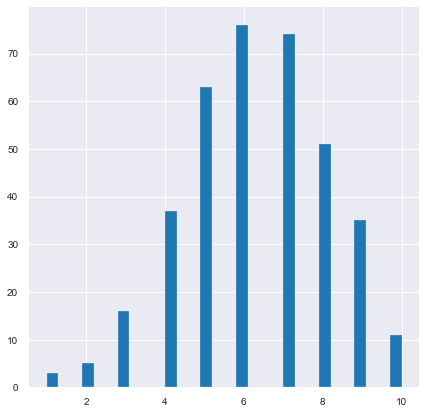

In [27]:
# Making histogram 
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'], bins=30)
plt.show()

In [28]:
## Above graph x axix shows the number of wicketss, while the y axix shows the number of matches
# so from above we can conclude the more than 70 matches, batting second team won by 7 wickets

### Finding out the frequency of wins w.r.t each time after batting second

In [29]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          52
Royal Challengers Bangalore    46
Mumbai Indians                 46
Delhi Daredevils               42
Rajasthan Royals               41
Chennai Super Kings            41
Kings XI Punjab                39
Sunrisers Hyderabad            23
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

### making a bar plot for top-3 teams with most wins after batting second


<BarContainer object of 3 artists>

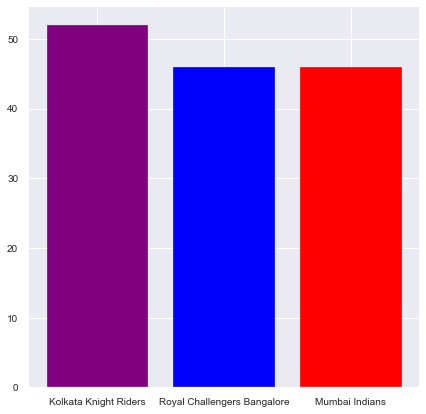

In [30]:
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["purple","blue","red"])

### making pie chart for distribution of most wins after batting second

([<matplotlib.patches.Wedge at 0x1f302193a58>,
 [Text(0.9950716721938458, 0.46886284476096357, 'Kolkata Knight Riders'),
  Text(0.32571386545268216, 1.0506714414372706, 'Royal Challengers Bangalore'),
  Text(-0.5064310632541456, 0.9764873671334799, 'Mumbai Indians'),
  Text(-1.0343680014298742, 0.3742764187308199, 'Delhi Daredevils'),
  Text(-1.0311616341829322, -0.38302178030653156, 'Rajasthan Royals'),
  Text(-0.5473089054687326, -0.9541765884754343, 'Chennai Super Kings'),
  Text(0.1716178760795585, -1.0865299372819608, 'Kings XI Punjab'),
  Text(0.6930966066261225, -0.8541762662842806, 'Sunrisers Hyderabad'),
  Text(0.9123462341837398, -0.6145114717975154, 'Gujarat Lions'),
  Text(1.014025384060828, -0.4263244310150317, 'Deccan Chargers'),
  Text(1.064696283416999, -0.2764449747744195, 'Pune Warriors'),
  Text(1.085793567147526, -0.176216711866528, 'Rising Pune Supergiant'),
  Text(1.0960585538690135, -0.09303572695780372, 'Kochi Tuskers Kerala'),
  Text(1.0996450758708665, -0.0279

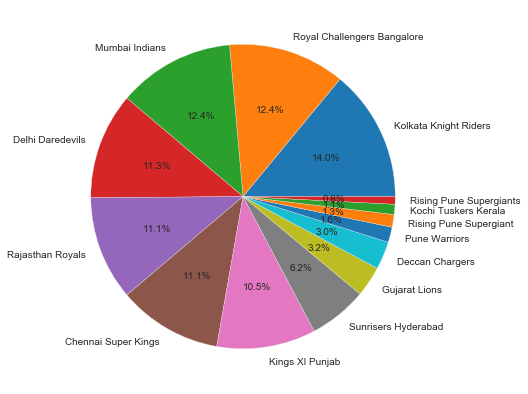

In [31]:
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')

### To find out number of matches played each sessions:

In [32]:
match_df['season'].value_counts()

2013    76
2012    74
2011    73
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [33]:
## Form above result we can say in year 2013, maximum number of matches has been played

### Looking at the number of matches played each city

In [34]:
match_df['city'].value_counts()

Mumbai            94
Kolkata           70
Delhi             67
Bangalore         66
Hyderabad         56
Chennai           49
Chandigarh        46
Jaipur            40
Pune              38
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Indore             9
Dharamsala         9
Johannesburg       8
Port Elizabeth     7
Bengaluru          7
Cape Town          7
Abu Dhabi          7
Cuttack            7
Ranchi             7
Raipur             6
Sharjah            6
Kochi              5
Kanpur             4
Nagpur             3
Mohali             3
East London        3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64

In [35]:
## This shows mumbai has hosted maximum number of matches in all season of IPL.

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

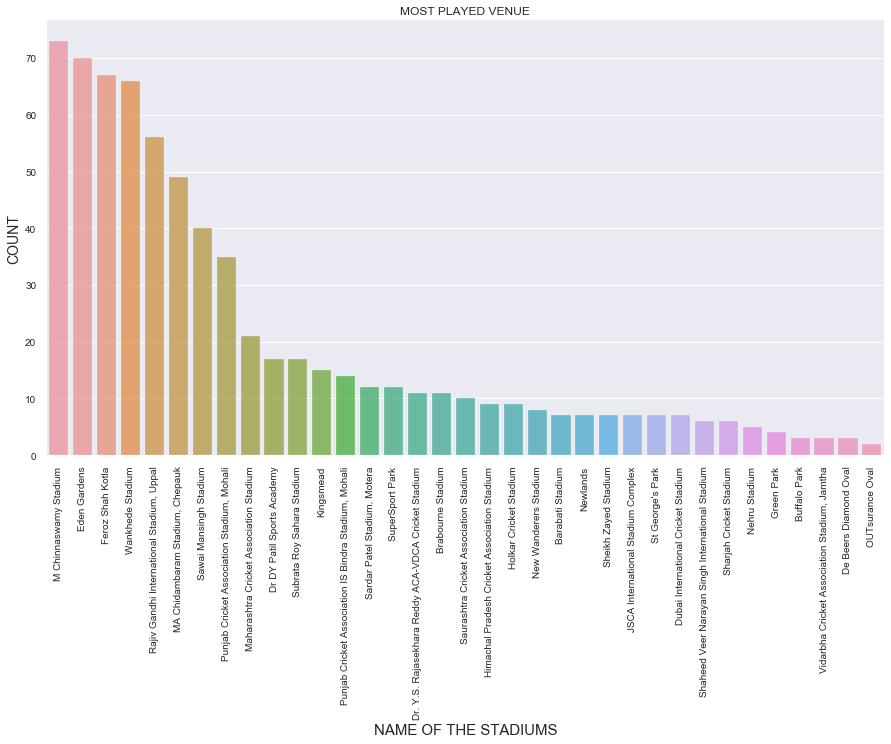

In [37]:
sns.set_style("darkgrid")
ls=match_df['venue'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('MOST PLAYED VENUE')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE STADIUMS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

### To check the popularity of umpire

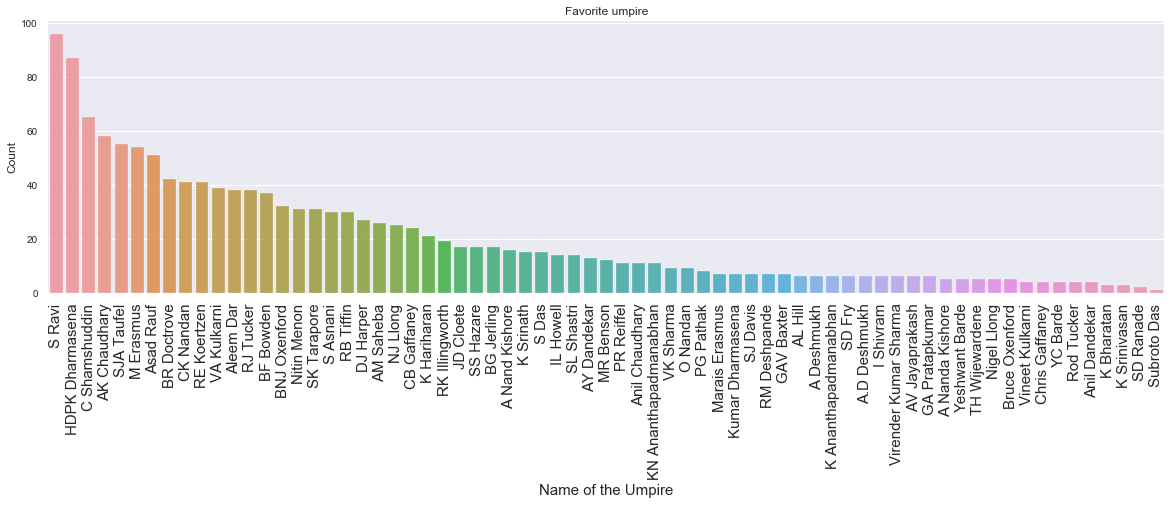

In [38]:

temp=pd.concat([match_df['umpire1'],match_df['umpire2']]).value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
Most_umpired =sns.barplot(x=temp.index, y=temp.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=90,labels=temp.index,fontsize=15)
plt.show()

## We also can check, which stadium prefer batting first or second as per past results

>> Check for Ferozshah kotla and for Chepok chennai

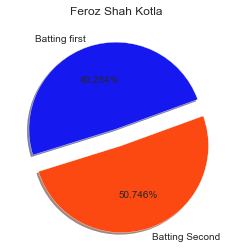

In [39]:
Delhi_stadium=match_df.loc[(match_df['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=20,shadow=1,explode=(0,0.2),autopct='%2.3f%%',colors=['#1519ef','#fc4811'])
plt.title('Feroz Shah Kotla')
plt.show()

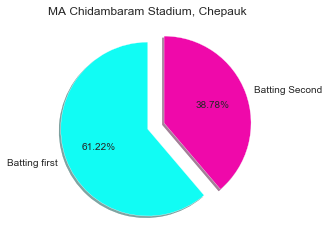

In [40]:
Chennai_stadium=match_df.loc[(match_df['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%4.2f%%',colors=['#11fcf4','#ef09aa'])
plt.title('MA Chidambaram Stadium, Chepauk')
plt.show()

###  Take some populer plyers and try to find out there past session performance 

In [41]:
batsman_grp = del_df.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
batsmen = match_df[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

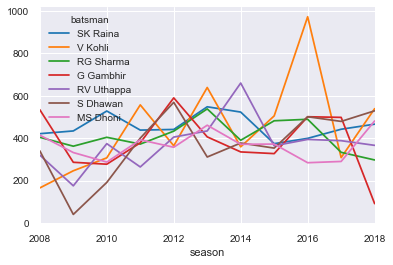

In [42]:
batsman_runsperseason = batsmen.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1)
batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:7].T.plot()

## Finding out how many times a team has won the matches after winning the toss:

In [43]:
np.sum(match_df['toss_winner']== match_df['winner'])

357

#### Graphical representation

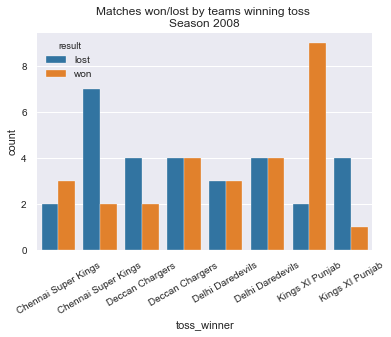

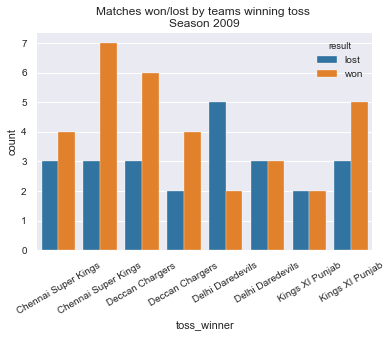

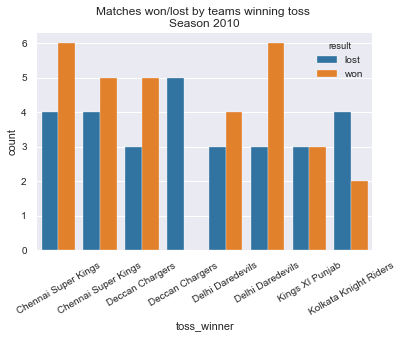

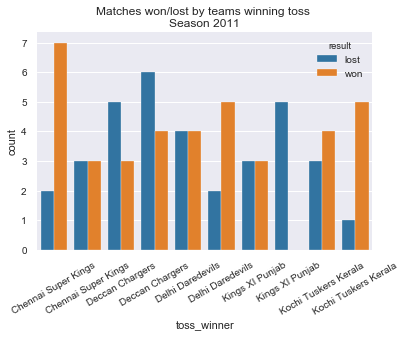

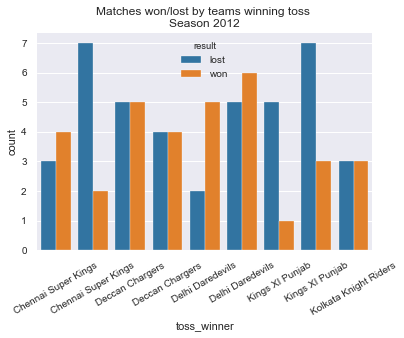

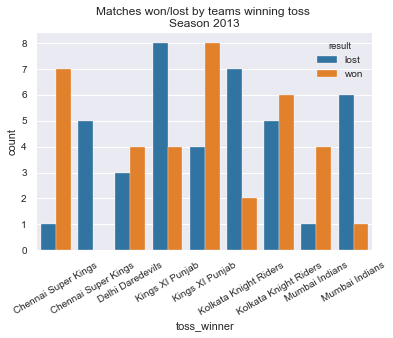

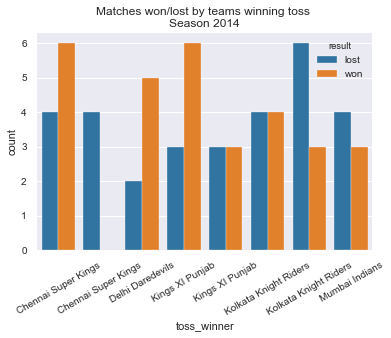

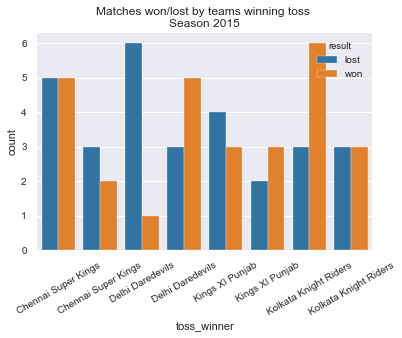

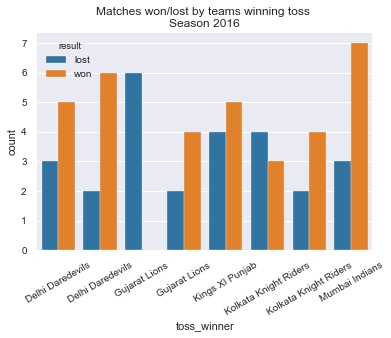

In [44]:
toss = match_df.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2017, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.show()
    x+=1

# This shows in all season, the team who won toss has also won the match 357 times

## Match by match analysis using the table delivery

In [45]:
del_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [46]:
del_df['match_id'].unique()  #to find out the unique match id

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [47]:
 del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

### To find out the records of match 1

In [48]:
match1 = del_df[del_df['match_id']==1]

In [49]:
match1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [50]:
match1.shape

(248, 21)

In [51]:
## This means 8 ball were in extras

In [52]:
srh=match1[match1['inning']==1]

In [53]:
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [54]:
# Form above we can calculate that there were 57 single runs, 32 dot balls, 17 number of boundry, 7 number of sixes

In [55]:
rcb=match1[match1['inning']==2]

In [56]:
rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [57]:
rcb['dismissal_kind'].value_counts()

caught     6
bowled     2
run out    2
Name: dismissal_kind, dtype: int64

In [58]:
# From above we can find out, that there were 6 cought out, 2 runout, 2 bowled

In [59]:
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [60]:
## from above we can calculate there were 3 cought out , and 1 bowled

### How many times did the captain choose fielding and batting after winning the toss?


In [61]:
match_df['toss_decision'].value_counts()

field    413
bat      283
Name: toss_decision, dtype: int64

### % of matches where the toss winning team's captain chose fielding and batting


In [64]:
round(match_df['toss_decision'].value_counts()/match_df['toss_decision'].count()*100, 2)

field    59.34
bat      40.66
Name: toss_decision, dtype: float64

### Stadiums which have hosted D/L method applied matches 


In [76]:
match_df.query('dl_applied==1')['venue']

56                                 M Chinnaswamy Stadium
99                                      Feroz Shah Kotla
102                                         Eden Gardens
119                                             Newlands
122                                            Kingsmead
148                                      SuperSport Park
251                                        Nehru Stadium
280                                         Eden Gardens
290                                M Chinnaswamy Stadium
488                                     Feroz Shah Kotla
536    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
567            Rajiv Gandhi International Stadium, Uppal
597            Rajiv Gandhi International Stadium, Uppal
620                                         Eden Gardens
624    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
625                                M Chinnaswamy Stadium
641                               Sawai Mansingh Stadium
653                            

### Cities which have witnessed D/L method applied matches


In [77]:
match_df.query('dl_applied==1')['city']

56         Bangalore
99             Delhi
102          Kolkata
119        Cape Town
122           Durban
148        Centurion
251            Kochi
280          Kolkata
290        Bangalore
488            Delhi
536    Visakhapatnam
567        Hyderabad
597        Hyderabad
620          Kolkata
624    Visakhapatnam
625        Bangalore
641           Jaipur
653          Kolkata
667            Delhi
Name: city, dtype: object

### Seasons with D/L method applied matches


In [79]:
year=match_df.query('dl_applied==1')['season']
year

56     2017
99     2008
102    2008
119    2009
122    2009
148    2009
251    2011
280    2011
290    2011
488    2014
536    2015
567    2015
597    2016
620    2016
624    2016
625    2016
641    2018
653    2018
667    2018
Name: season, dtype: int64

### Plot to visualise the no. of matches where D/L method was applied season wise


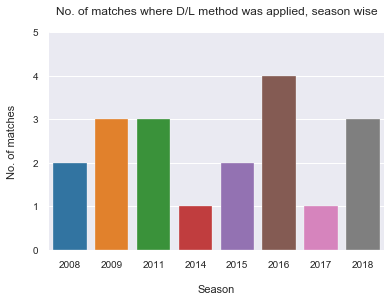

In [80]:

fig, ax=plt.subplots()
ax.set_ylim([0,5])
ax.set_title('No. of matches where D/L method was applied, season wise\n')
sns.countplot(x=year, data=match_df)
plt.xlabel('\nSeason')
plt.ylabel('No. of matches\n')
plt.show()

### Best venue for defending your total


In [70]:
match_df.venue[match_df.win_by_runs!=0].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

### Best venue to chase a total


In [72]:
match_df.venue[match_df.win_by_wickets!=0].mode()


0    Eden Gardens
dtype: object

### Best defending team


In [74]:
match_df.winner[match_df.win_by_runs!=0].mode()

0    Mumbai Indians
dtype: object

### Best chasing team


In [75]:
match_df.winner[match_df.win_by_wickets!=0].mode()


0    Kolkata Knight Riders
dtype: object

### Best Chasing venues:


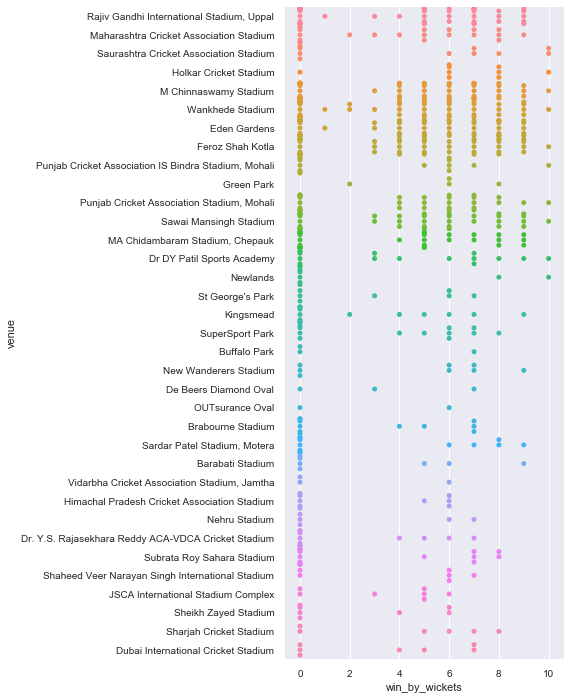

In [82]:
plt.figure(figsize=(5,12))

sns.swarmplot(x='win_by_wickets',y='venue',data=match_df)

plt.show()

Eden Gardens and M Chinnaswamy Stadium are the best venues for chasing, the density of each attribute contributes in the swarmplot figure.

 

### Best defending venue?


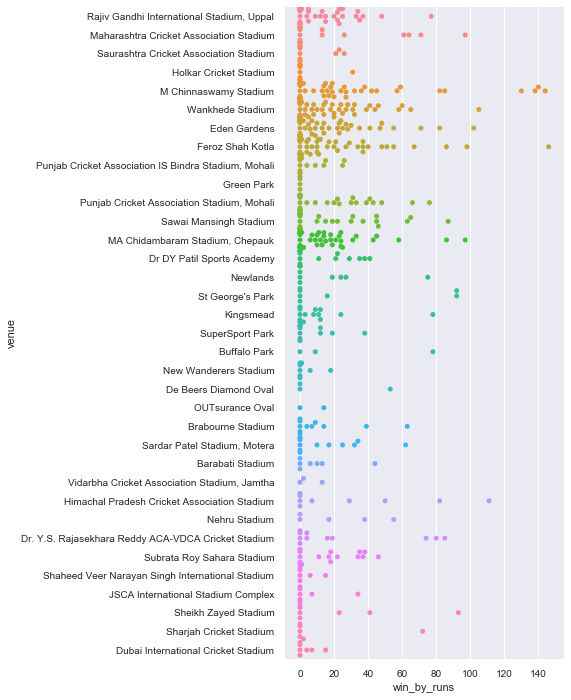

In [83]:
plt.figure(figsize=(5,12))

sns.swarmplot(x='win_by_runs',y='venue',data=match_df)

plt.show()

From the above swarmplot figure between venues and win_by_runs, we can say that MA Chidambaram Stadium is the best defending stadium.

### Heatmap :


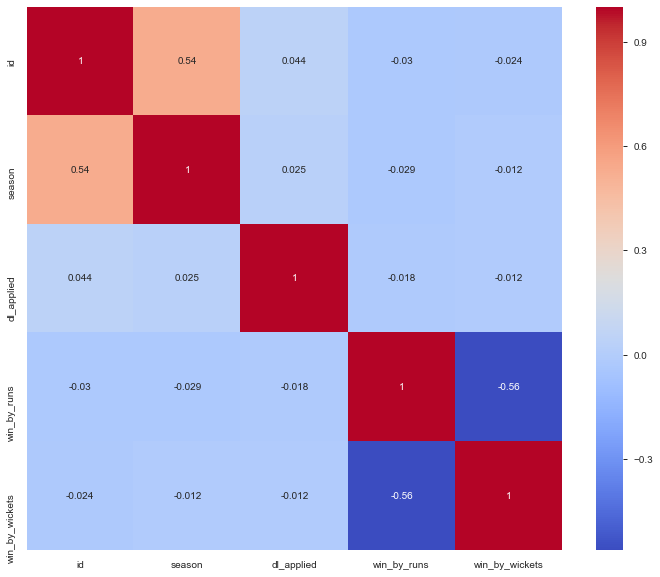

In [84]:
cor=match_df.corr()

plt.figure(figsize=(12,10))

sns.heatmap(cor,annot=True,cmap='coolwarm')

plt.show()

From the above heatmap diagram, there is a negative correlation between the win_by_runs and win_by_wickets , and we know that if one the value is zero then other would be a non-zero value


### Most successful ipl team?



<Figure size 3600x4320 with 0 Axes>

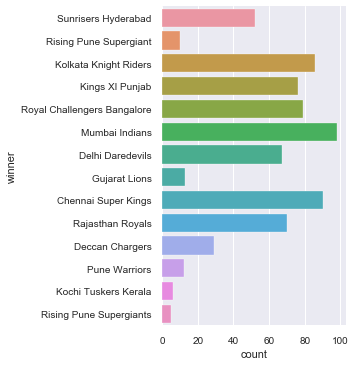

In [88]:
plt.figure(figsize=(50,60))

sns.factorplot(y='winner',kind='count',data=match_df)

plt.show()

From the above factorplot data, we can say that most winning team is the most successful team and Mumbai Indians is the most successful team followed by Chennai super kings and Kolkata knight riders.

### Team won by max runs?

### And

### The best defending team?

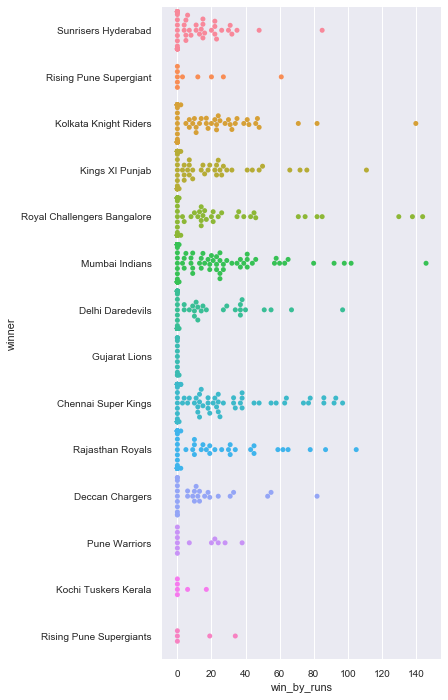

In [91]:
plt.figure(figsize=(5,12))

sns.swarmplot(x='win_by_runs',y='winner',data=match_df)

plt.show()

from the above swarm plot data, we can say that Mumbai Indians won by maximum runs in IPL history.

And

From the above data, the best defending team is Mumbai Indians.

### Team won by max wickets?

### and

### Best chasing team?

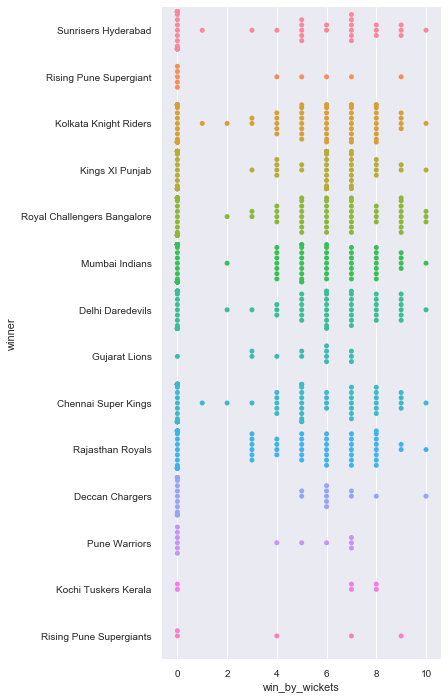

In [93]:
plt.figure(figsize=(5,12))

sns.swarmplot(x='win_by_wickets',y='winner',data=match_df)

plt.show()

From the above data, we can say Kolkata Knight Riders are best chasing team and

Most of the teams won by 9 wickets but Royal Challengers Bangalore won two times by maximum wickets taken.